<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Netflix-Series-Genre-Popularity-Analysis-by-US-Regions" data-toc-modified-id="Netflix-Series-Genre-Popularity-Analysis-by-US-Regions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Netflix Series Genre Popularity Analysis by US Regions</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sentiment Analysis</a></span></li><li><span><a href="#Network-Analysis" data-toc-modified-id="Network-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Network Analysis</a></span><ul class="toc-item"><li><span><a href="#Glow-Series" data-toc-modified-id="Glow-Series-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Glow Series</a></span></li><li><span><a href="#Wild-Wild-Country-Series" data-toc-modified-id="Wild-Wild-Country-Series-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Wild Wild Country Series</a></span></li><li><span><a href="#The-Waking-Dead-Series" data-toc-modified-id="The-Waking-Dead-Series-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The Waking Dead Series</a></span></li><li><span><a href="#Stranger-Things-Series" data-toc-modified-id="Stranger-Things-Series-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Stranger Things Series</a></span></li></ul></li></ul></div>

### Netflix Series Genre Popularity Analysis by US Regions

Our approach is to retrieve the tweets, pre-process it to remove non significant characters or strings, normalize the effect of query term, calculate the mean polarity for each series by region using ‘affin’ and build the network of users with retweets using tweepy API and generate network graphs using Gephi. 

### Sentiment Analysis

Load required libraries

In [8]:
import csv
import pandas as pd

Use Afinn method to calculate Polarity scores for each Tweet texts

In [9]:
from afinn import Afinn
afinn = Afinn()

Load all retrieved tweets from "netflixtweet_in.csv" into a dataframe

In [10]:
df = pd.read_csv("netflixtweet_in.csv", encoding = "latin1")
df.head()

,Tweet id,Text,Created_at,Scrn_User_name,User_name,RT_count,FV_count,User_location,Movie_name,Category,Tweeted_at_City,State
0,9.810000e+17,Am i hallucinating or wasn?t the second season...,4/2/2018 2:15,erinn_omalley,ërïn ??,0,0,NaN,13 Reasons Why,Drama,Wisconsin,Wisconsin
1,9.750000e+17,Don?t know why it?s taken me so long to watch ...,3/16/2018 23:59,TheRealTrissyJ,Tristan,0,3,"Mullens, WV",13 Reasons Why,Drama,West Virginia,West Virginia
2,9.840000e+17,Woah guys. I just watched this new show on Net...,4/10/2018 3:09,jfinley00,Jack Finley,1,13,NaN,13 Reasons Why,Drama,Washington,Washington
3,9.810000e+17,"As if my depression wasn?t bad enough today, I...",4/2/2018 2:40,_lauren_albina,Lor?,0,1,NaN,13 Reasons Why,Drama,Virginia,Virginia
4,9.840000e+17,i don?t understand what a 2nd season if 13 Rea...,4/11/2018 15:09,slmxtch,Samantha ??,0,8,the room where it happens,13 Reasons Why,Drama,Virginia,Virginia


Data Prep-processing to remove hashtags, mentions, URLs, special char &numbers. HTML encoding & UTF-8 decoding

In [11]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
import re

In [12]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.Text
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

df['Text_Clean'] = test_result
df.head()

,Tweet id,Text,Created_at,Scrn_User_name,User_name,RT_count,FV_count,User_location,Movie_name,Category,Tweeted_at_City,State,Text_Clean
0,9.810000e+17,Am i hallucinating or wasn?t the second season...,4/2/2018 2:15,erinn_omalley,ërïn ??,0,0,NaN,13 Reasons Why,Drama,Wisconsin,Wisconsin,am i hallucinating or wasn t the second season...
1,9.750000e+17,Don?t know why it?s taken me so long to watch ...,3/16/2018 23:59,TheRealTrissyJ,Tristan,0,3,"Mullens, WV",13 Reasons Why,Drama,West Virginia,West Virginia,don t know why it s taken me so long to watch ...
2,9.840000e+17,Woah guys. I just watched this new show on Net...,4/10/2018 3:09,jfinley00,Jack Finley,1,13,NaN,13 Reasons Why,Drama,Washington,Washington,woah guys i just watched this new show on netf...
3,9.810000e+17,"As if my depression wasn?t bad enough today, I...",4/2/2018 2:40,_lauren_albina,Lor?,0,1,NaN,13 Reasons Why,Drama,Virginia,Virginia,as if my depression wasn t bad enough today i ...
4,9.840000e+17,i don?t understand what a 2nd season if 13 Rea...,4/11/2018 15:09,slmxtch,Samantha ??,0,8,the room where it happens,13 Reasons Why,Drama,Virginia,Virginia,i don t understand what a nd season if reasons...


Calculate Polarity for each tweet

In [13]:
#Calculate and add polarity score
pscore = []
state = []

for text in df['Text_Clean']:
    pscore.append(afinn.score(text))
        
df['pscore'] = pscore

df.head()

,Tweet id,Text,Created_at,Scrn_User_name,User_name,RT_count,FV_count,User_location,Movie_name,Category,Tweeted_at_City,State,Text_Clean,pscore
0,9.810000e+17,Am i hallucinating or wasn?t the second season...,4/2/2018 2:15,erinn_omalley,ërïn ??,0,0,NaN,13 Reasons Why,Drama,Wisconsin,Wisconsin,am i hallucinating or wasn t the second season...,2.0
1,9.750000e+17,Don?t know why it?s taken me so long to watch ...,3/16/2018 23:59,TheRealTrissyJ,Tristan,0,3,"Mullens, WV",13 Reasons Why,Drama,West Virginia,West Virginia,don t know why it s taken me so long to watch ...,0.0
2,9.840000e+17,Woah guys. I just watched this new show on Net...,4/10/2018 3:09,jfinley00,Jack Finley,1,13,NaN,13 Reasons Why,Drama,Washington,Washington,woah guys i just watched this new show on netf...,3.0
3,9.810000e+17,"As if my depression wasn?t bad enough today, I...",4/2/2018 2:40,_lauren_albina,Lor?,0,1,NaN,13 Reasons Why,Drama,Virginia,Virginia,as if my depression wasn t bad enough today i ...,-3.0
4,9.840000e+17,i don?t understand what a 2nd season if 13 Rea...,4/11/2018 15:09,slmxtch,Samantha ??,0,8,the room where it happens,13 Reasons Why,Drama,Virginia,Virginia,i don t understand what a nd season if reasons...,2.0


Abbreviate the state names to a 2 letter character for consistency and add the state value in the new column 'State_new'

In [14]:
statesdict = {
        'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan',
        'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana',
        'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire',
        'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands',
        'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
             }

newst = []
for st in df.State.values:
    st = str.strip(st)
    new = st
    for key, value in statesdict.items():
        if st == value:
            new = key
            break
    newst.append(new)
    
df['State_New'] = newst
df.head()

,Tweet id,Text,Created_at,Scrn_User_name,User_name,RT_count,FV_count,User_location,Movie_name,Category,Tweeted_at_City,State,Text_Clean,pscore,State_New
0,9.810000e+17,Am i hallucinating or wasn?t the second season...,4/2/2018 2:15,erinn_omalley,ërïn ??,0,0,NaN,13 Reasons Why,Drama,Wisconsin,Wisconsin,am i hallucinating or wasn t the second season...,2.0,WI
1,9.750000e+17,Don?t know why it?s taken me so long to watch ...,3/16/2018 23:59,TheRealTrissyJ,Tristan,0,3,"Mullens, WV",13 Reasons Why,Drama,West Virginia,West Virginia,don t know why it s taken me so long to watch ...,0.0,WV
2,9.840000e+17,Woah guys. I just watched this new show on Net...,4/10/2018 3:09,jfinley00,Jack Finley,1,13,NaN,13 Reasons Why,Drama,Washington,Washington,woah guys i just watched this new show on netf...,3.0,WA
3,9.810000e+17,"As if my depression wasn?t bad enough today, I...",4/2/2018 2:40,_lauren_albina,Lor?,0,1,NaN,13 Reasons Why,Drama,Virginia,Virginia,as if my depression wasn t bad enough today i ...,-3.0,VA
4,9.840000e+17,i don?t understand what a 2nd season if 13 Rea...,4/11/2018 15:09,slmxtch,Samantha ??,0,8,the room where it happens,13 Reasons Why,Drama,Virginia,Virginia,i don t understand what a nd season if reasons...,2.0,VA


Add new column 'Region' based on the state value

In [15]:
regiondict = {'AK': 'West', 'AL': 'South', 'AR': 'South', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'CT': 'Northeast',
        'DC': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South', 'HI': 'West', 'IA': 'Midwest', 'ID': 'West',
        'IL': 'Midwest', 'IN': 'Midwest', 'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'MA': 'Northeast', 'MD': 'South',
        'ME': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'MS': 'South', 'MT': 'West', 'NC': 'South',
        'ND': 'Midwest', 'NE': 'Midwest', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 'NV': 'West', 'NY': 'Northeast',
        'OH': 'East', 'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest',
        'TN': 'South', 'TX': 'South', 'UT': 'West', 'VA': 'South', 'VT': 'Northeast', 'WA': 'West', 'WI': 'Midwest',
        'WV': 'South', 'WY': 'West'
             }

region = []
for st in df.State_New.values:
    st = str.strip(st)
    for key, value in regiondict.items():
        if st == key:
            break
    region.append(value)
    
df['Region'] = region
df.head()

,Tweet id,Text,Created_at,Scrn_User_name,User_name,RT_count,FV_count,User_location,Movie_name,Category,Tweeted_at_City,State,Text_Clean,pscore,State_New,Region
0,9.810000e+17,Am i hallucinating or wasn?t the second season...,4/2/2018 2:15,erinn_omalley,ërïn ??,0,0,NaN,13 Reasons Why,Drama,Wisconsin,Wisconsin,am i hallucinating or wasn t the second season...,2.0,WI,Midwest
1,9.750000e+17,Don?t know why it?s taken me so long to watch ...,3/16/2018 23:59,TheRealTrissyJ,Tristan,0,3,"Mullens, WV",13 Reasons Why,Drama,West Virginia,West Virginia,don t know why it s taken me so long to watch ...,0.0,WV,South
2,9.840000e+17,Woah guys. I just watched this new show on Net...,4/10/2018 3:09,jfinley00,Jack Finley,1,13,NaN,13 Reasons Why,Drama,Washington,Washington,woah guys i just watched this new show on netf...,3.0,WA,West
3,9.810000e+17,"As if my depression wasn?t bad enough today, I...",4/2/2018 2:40,_lauren_albina,Lor?,0,1,NaN,13 Reasons Why,Drama,Virginia,Virginia,as if my depression wasn t bad enough today i ...,-3.0,VA,South
4,9.840000e+17,i don?t understand what a 2nd season if 13 Rea...,4/11/2018 15:09,slmxtch,Samantha ??,0,8,the room where it happens,13 Reasons Why,Drama,Virginia,Virginia,i don t understand what a nd season if reasons...,2.0,VA,South


Export the final dataframe with polarity score and region into a csv file 'netflixtweet_out.csv'

In [16]:
df.to_csv('netflixtweet_out.csv')

Apply different grouping using pandas to check the cout of tweets, polarity scores by region, category and series

In [17]:
#Tweent count by category and series
df.groupby(["Category", "Movie_name"]).Movie_name.count()

Category  Movie_name                    
Action    Dare devil                        158
          Gotham                            171
          Jessica Jones                     292
          Supernatural                      192
          The Walking_dd                    259
Comedy    Dis Jointed                        63
          Grace and Frankie                  38
          One Day at a Time                  68
          everything_suks                   156
          glow                              117
Docu      Dty_Money                          71
          Girls Incarcerated                115
          Shot In The Dark                   18
          Ugly_Delicious                     88
          Wild Wild Country                 420
Drama     13 Reasons Why                    247
          A Series of Unfortunate Events    853
          Altered Carbon                    145
          Seven Seconds                     535
          Stranger Things                   478

In [18]:
#Polarity by Region
df.groupby(['Region']).pscore.mean()

Region
East         0.633333
Midwest      0.806122
Northeast    0.866584
South        0.743222
West         0.739417
Name: pscore, dtype: float64

In [19]:
#Polarity score by Category
df.groupby(['Category']).pscore.mean()

Category
Action    1.139925
Comedy    1.323529
Docu      0.775281
Drama     0.482285
Name: pscore, dtype: float64

In [20]:
#Polarity score by Region and Category
df.groupby(['Region', 'Category']).pscore.mean()

Region     Category
East       Action      0.457143
           Comedy      1.083333
           Docu        0.705882
           Drama       0.627907
Midwest    Action      1.007143
           Comedy      0.490909
           Docu        1.030000
           Drama       0.692833
Northeast  Action      1.275304
           Comedy      1.254902
           Docu        0.567797
           Drama       0.552239
South      Action      1.159314
           Comedy      1.248588
           Docu        0.987805
           Drama       0.439048
West       Action      1.144628
           Comedy      2.041667
           Docu        0.549784
           Drama       0.376518
Name: pscore, dtype: float64

In [21]:
#Polarity by series
df.groupby(['Movie_name']).pscore.mean()

Movie_name
13 Reasons Why                    0.178138
A Series of Unfortunate Events    0.534584
Altered Carbon                    0.855172
Dare devil                        1.645570
Dis Jointed                       1.000000
Dty_Money                         0.647887
Girls Incarcerated                0.965217
Gotham                            1.467836
Grace and Frankie                 2.000000
Jessica Jones                     1.232877
One Day at a Time                 2.102941
Seven Seconds                     0.465421
Shot In The Dark                  1.388889
Stranger Things                   0.451883
Supernatural                      1.270833
The Walking_dd                    0.413127
Ugly_Delicious                    1.465909
Wild Wild Country                 0.573810
everything_suks                   1.064103
glow                              1.170940
Name: pscore, dtype: float64

### Network Analysis

We pick one series from each category to find the network. The users relationship is already extracted and avaialble in the csv file. Here we use the csv file to generate graphml file and upload it into Gelphi to calculate network measures such as degree, closeness & betweeness centrality

In [22]:
import networkx as nx
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#### Glow Series

In [23]:
glow = pd.read_csv('Glow Network Data.csv')
glow_edges = list(zip(*[glow[c].values.tolist() for c in glow]))
glow_edges[:5]

[('Khyrughh', '_Retro_Kai_'),
 ('ellavosmusic', 'KayJulia7'),
 ('ellavosmusic', 'menamonkey'),
 ('ellavosmusic', 'torpal11'),
 ('ellavosmusic', '_anthonymejia_')]

C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

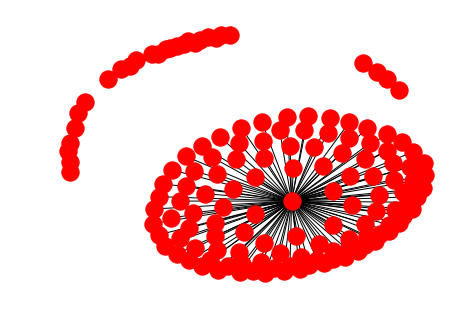

In [24]:
G = nx.Graph()
G.add_edges_from(glow_edges)
nx.draw(G)
plt.show()

In [25]:
#save and export the network for further analysis in Gephi tool
nx.write_graphml(G,"glow.graphml")

#### Wild Wild Country Series

In [26]:
wildcountry = pd.read_csv('WildWild Country Network Data.csv')
wildcountry_edges = list(zip(*[wildcountry[c].values.tolist() for c in wildcountry]))
wildcountry_edges[:5]

[('RoseMinutaglio', 'bminutaglio'),
 ('RoseMinutaglio', 'sarmchugh'),
 ('RoseMinutaglio', 'justinkirkland4'),
 ('RoseMinutaglio', 'esquire'),
 ('SpanishKibosh', 'esquire')]

C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

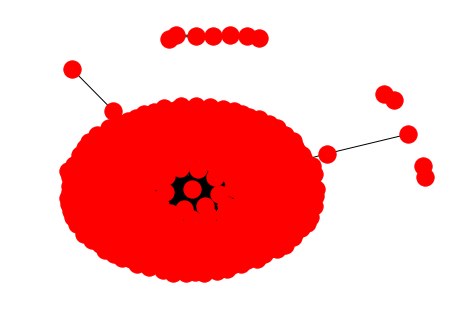

In [27]:
G = nx.Graph()
G.add_edges_from(wildcountry_edges)
nx.draw(G)

plt.show()

In [28]:
#save and export the network for further analysis in Gephi tool
nx.write_graphml(G,"WildWildCountry.graphml")

#### The Waking Dead Series

In [29]:
TheWalkingDead = pd.read_csv('TheWalkingDead Network Data.csv')
TheWalkingDead_edges = list(zip(*[TheWalkingDead[c].values.tolist() for c in TheWalkingDead]))
TheWalkingDead_edges[:5]

[('sheltondesigner', 'arthurdailey78'),
 ('sheltondesigner', 'LarryMarvin1'),
 ('sheltondesigner', 'sfmpetersen'),
 ('arthurdailey78', 'sfmpetersen'),
 ('Aoiferocksitout', 'Dazza70Smith')]

C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

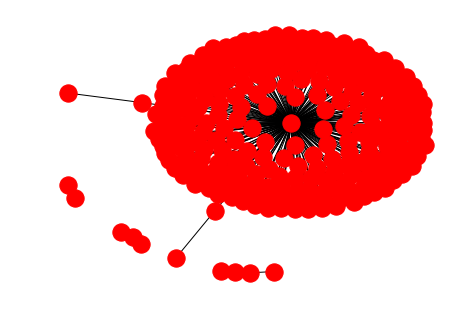

In [30]:
G = nx.Graph()
G.add_edges_from(TheWalkingDead_edges)
nx.draw(G)

plt.show()

In [31]:
#save and export the network for further analysis in Gephi tool
nx.write_graphml(G,"TheWalkingDead.graphml")

#### Stranger Things Series

In [32]:
StrangerThings = pd.read_csv('StrangerThings Network Data.csv')
StrangerThings_edges = list(zip(*[StrangerThings[c].values.tolist() for c in StrangerThings]))
StrangerThings_edges[:5]

[('ryan_bonkowski', 'childish_mel'),
 ('childish_mel', 'ryan_bonkowski'),
 ('ryan_bonkowski', 'yoitssalex'),
 ('yoitssalex', 'ryan_bonkowski'),
 ('ryan_bonkowski', 'katthekindle')]

C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Devi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Devi\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

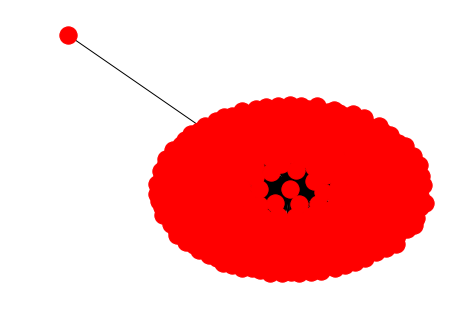

In [33]:
G = nx.Graph()
G.add_edges_from(StrangerThings_edges)
nx.draw(G)

plt.show()

In [34]:
#save and export the network for further analysis in Gephi tool
nx.write_graphml(G,"StrangerThings.graphml")